# Week 5 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [1]:
no_games = 5

## Functions

In [4]:
def per_week_stats(dataframe, column1, column2):
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [5]:
def per_week(dataframe, column1, no_games):
    dataframe[column1 + '_pG'] = dataframe[column1]/no_games

In [6]:
def print_metric(dataframe, metric, player_inx):
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [7]:
def print_metric_team(dataframe, metric, team_inx):
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [8]:
def bar_plot(x, y, metric, x_label, y_label):
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

## Read in DataFrames

In [186]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')

In [187]:
print(offense.shape)
offense.head()

(488, 33)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4
0,Alvin Kamara,NOR,RB,25,4,3,0,0,0,0,0,50,236,11.20,4,35,30,321,17.00,3,0,0,7,0,0,112.70,1,1,97.70,18.70,29.40,31.70,17.9
1,Russell Wilson,SEA,QB,32,4,4,103,137,1285,16,2,18,95,7.80,0,0,0,0,0.00,0,1,0,0,0,1,124.90,1,2,124.90,31.80,34.40,36.80,21.9
2,Dak Prescott,DAL,QB,27,4,4,137,201,1690,9,3,16,86,8.80,3,0,0,0,0.00,0,3,3,3,1,1,125.20,2,3,125.20,17.60,39.80,29.50,38.3
3,Aaron Jones,GNB,RB,26,4,4,0,0,0,0,0,65,374,12.50,4,23,15,135,9.00,2,1,0,6,0,0,94.40,2,4,86.90,13.60,41.60,14.60,17.1
4,Dalvin Cook,MIN,RB,25,4,4,0,0,0,0,0,75,424,11.50,6,11,7,40,12.10,0,1,1,6,3,0,89.90,3,5,86.40,20.80,15.10,23.90,26.6


In [190]:
print(defense.shape)
defense.head()

(32, 27)


,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4
0,Indianapolis Colts,56,213,4.40,945,86,308,3.60,1,117,5.00,73,9.60,637,5,8,5,62.50,7,7,0,10,52.00,4.00,15.00,26.00,7.00
1,Pittsburgh Steelers,58,183,4.80,870,61,162,2.70,1,107,5.80,64,12.80,708,6,9,4,44.40,5,4,1,15,38.00,8.00,13.00,7.00,10.00
2,Kansas City Chiefs,70,264,5.40,1424,122,644,5.30,3,130,5.50,77,11.10,780,4,13,7,53.80,7,5,2,12,39.00,7.00,5.00,7.00,20.00
3,San Francisco 49ers,71,248,4.80,1179,108,443,4.10,3,132,5.30,82,9.50,736,3,6,3,50.00,5,3,2,8,27.00,4.00,5.00,12.00,6.00
4,Baltimore Ravens,73,268,5.50,1470,97,390,4.00,3,162,6.30,109,10.70,1080,6,9,7,77.80,7,2,5,9,37.00,15.00,15.00,1.00,6.00


In [191]:
per_week(defense, 'Ttl_Pts_Allowed', no_games)
per_week(defense, 'Ttl_Yds', no_games)
per_week(defense, 'Rushing_Att', no_games)
per_week(defense, 'Rushing_Yds', no_games)
per_week(defense, 'Passing_Att', no_games)
per_week(defense, 'Completions', no_games)
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week(defense, 'Passing_Yds', no_games)
per_week(defense, 'Sacks', no_games)
per_week(defense, 'TTL', no_games)

In [179]:
offense[offense['Player'] == 'Ezekiel Elliott']

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4
10,Ezekiel Elliott,DAL,RB,25,4,4,0,0,0,0,0,70,273,12.00,3,30,23,159,15.10,1,3,2,4,1,0,76.70,4,11,65.20,24.70,16.20,11.80,12.5


In [141]:
taken_wrt = ['Davantae Adams', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', 'Tyler Boyd', 'A.J. Brown', 
             'John Brown', 'Marquise Brown', 'DJ Chark', 'Nick Chubb', 'James Conner', 'Dalvin Cook', 'Jared Cook', 
             'Amari Cooper', 'Mike Davis', 'Stefon Diggs', 'J.K. Dobbins', 'Kenyan Drake', 'Julian Edelman', 
             'Clyde Edwards-Helaire', 'Austen Ekeler', 'Ezekiel Elliott', 'Evan Engram', 'Zach Ertz', 'Mike Evans', 
             'Noah Fant', 'Will Fuller', 'Michael Gallup', 'Mike Gesicki', 'Chris Godwin', 'Kenny Golladay', 
             'Melvin Gordon', 'A.J. Green', 'Todd Gurley', 'Hunter Henry', 'Tyler Higbee', 'Tyreek Hill', 
             'T.Y. Hilton', 'T.J. Hockenson', 'Jordan Howard', 'Kareem Hunt', 'Hayden Hurst', 'Josh Jacobs', 
             'Jerry Jeudy', 'David Johnson', 'Aaron Jones', 'Alvin Kamara', 'Travis Kelce', 'George Kittle', 
             'Cooper Kupp', 'CeeDee Lamb', 'Tyler Lockett', 'Christian McCaffrey', 'Jerick McKinnon', 'D.K. Metcalf', 
             'Joe Mixon', 'David Montgomery', 'DJ Moore', 'Zack Moss', 'Raheem Mostert', 'DeVante Parker', 
             'Calvin Ridley', 'James Robinson', 'Allen Robinson', 'Miles Sanders', 'Devin Singletary', 
             'Darius Slayton', 'JuJu Smith-Schuster', 'Jonathan Taylor', 'Adam Thielen', 'Michael Thomas', 
             'Darren Waller', 'Robert Woods']


In [58]:
myteam_wrt = ['Brandon Aiyuk', 'Mo Alie-Cox', 'Robby Anderson', 'Chris Carson', 'Darrell Henderson', 'Derrick Henry', 
              'DeAndre Hopkins', 'Mark Ingram', 'Diontae Johnson', 'Julio Jones', 'Jonnu Smith']


## QB Analysis

In [20]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4
1,Russell Wilson,SEA,QB,32,4,4,103,137,1285,16,2,18,95,7.80,0,0,0,0,0.00,0,1,0,0,0,1,124.90,1,2,124.90,31.80,34.40,36.80,21.9
2,Dak Prescott,DAL,QB,27,4,4,137,201,1690,9,3,16,86,8.80,3,0,0,0,0.00,0,3,3,3,1,1,125.20,2,3,125.20,17.60,39.80,29.50,38.3
5,Josh Allen,BUF,QB,24,4,4,105,148,1326,12,1,25,83,6.20,3,0,0,0,0.00,0,3,3,3,0,0,120.30,3,6,120.30,28.20,34.50,32.20,25.4
6,Patrick Mahomes,KAN,QB,25,4,4,101,150,1134,11,0,18,108,6.00,1,0,0,0,0.00,0,0,0,1,0,1,108.20,4,7,108.10,20.40,27.50,40.00,20.2
7,Kyler Murray,ARI,QB,23,4,4,99,144,919,7,5,32,265,10.80,4,0,0,0,0.00,0,1,1,4,0,0,108.30,5,8,108.20,27.30,33.10,24.70,23.1


In [22]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [23]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
1,Russell Wilson,SEA,QB,32,4,4,103,137,1285,16,2,18,95,7.80,0,0,0,0,0.00,0,1,0,0,0,1,124.90,1,2,124.90,31.80,34.40,36.80,21.9,25.75,34.25,0.75,321.25,4.00,9.38,23.75,31.23
2,Dak Prescott,DAL,QB,27,4,4,137,201,1690,9,3,16,86,8.80,3,0,0,0,0.00,0,3,3,3,1,1,125.20,2,3,125.20,17.60,39.80,29.50,38.3,34.25,50.25,0.68,422.50,2.25,8.41,21.50,31.30
5,Josh Allen,BUF,QB,24,4,4,105,148,1326,12,1,25,83,6.20,3,0,0,0,0.00,0,3,3,3,0,0,120.30,3,6,120.30,28.20,34.50,32.20,25.4,26.25,37.00,0.71,331.50,3.00,8.96,20.75,30.07
6,Patrick Mahomes,KAN,QB,25,4,4,101,150,1134,11,0,18,108,6.00,1,0,0,0,0.00,0,0,0,1,0,1,108.20,4,7,108.10,20.40,27.50,40.00,20.2,25.25,37.50,0.67,283.50,2.75,7.56,27.00,27.02
7,Kyler Murray,ARI,QB,23,4,4,99,144,919,7,5,32,265,10.80,4,0,0,0,0.00,0,1,1,4,0,0,108.30,5,8,108.20,27.30,33.10,24.70,23.1,24.75,36.00,0.69,229.75,1.75,6.38,66.25,27.05


In [24]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
count,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,45.00,48.00,48.00,45.00,48.00,48.00
mean,28.83,3.17,2.67,62.00,92.98,694.48,4.67,2.02,11.00,48.33,7.07,0.60,0.12,0.12,0.35,0.16,0.00,1.25,0.54,0.60,0.04,0.25,52.52,52.45,12.98,13.61,13.25,17.71,26.80,0.65,197.85,1.29,7.74,13.05,14.59
std,5.44,1.08,1.63,40.87,59.85,462.91,3.96,1.82,8.94,60.23,4.12,1.09,0.49,0.49,3.45,2.18,0.00,1.39,0.92,1.09,0.20,0.48,38.00,38.01,10.40,12.12,11.03,9.35,13.62,0.14,106.91,1.00,4.89,15.52,9.09
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,-1.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,-2.50,0.00
25%,24.00,2.75,1.00,21.25,36.00,229.00,1.00,0.00,5.00,3.00,4.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.18,11.18,0.15,0.00,0.53,13.88,21.00,0.61,142.50,0.50,6.34,1.25,7.23
50%,27.50,4.00,4.00,72.50,108.00,800.50,4.00,2.00,9.50,29.50,7.05,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,58.40,58.15,14.00,13.80,12.70,20.88,31.25,0.67,226.00,1.25,7.42,8.12,16.81
75%,32.00,4.00,4.00,98.00,142.50,1070.25,7.00,3.00,16.00,77.00,9.25,1.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,76.92,76.92,21.05,23.40,20.65,24.56,36.00,0.71,273.19,2.00,8.13,19.25,19.74
max,43.00,4.00,4.00,137.00,201.00,1690.00,16.00,7.00,39.00,265.00,18.80,4.00,3.00,3.00,23.00,13.70,0.00,5.00,4.00,4.00,1.00,2.00,125.20,125.20,31.80,39.80,40.00,34.25,50.25,1.00,422.50,4.00,38.00,66.25,31.30


In [25]:
quarterbacks[quarterbacks['Player'].isin(['Dak Prescott', 'Aaron Rodgers'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
2,Dak Prescott,DAL,QB,27,4,4,137,201,1690,9,3,16,86,8.80,3,0,0,0,0.00,0,3,3,3,1,1,125.20,2,3,125.20,17.60,39.80,29.50,38.3,34.25,50.25,0.68,422.50,2.25,8.41,21.50,31.30
8,Aaron Rodgers,GNB,QB,37,4,4,98,139,1214,13,0,6,31,6.70,0,1,1,-6,-6.00,0,0,0,0,0,0,103.60,6,9,103.10,30.80,18.20,24.50,29.6,24.50,34.75,0.71,303.50,3.25,8.73,7.75,25.77


In [41]:
qb1 = 2
qb2 = 8

Avg PassingYds_pG: 197.85
Dak Prescott PassingYds_pG: 422.5
--------------------------------------------------
Avg PassingYds_pG: 197.85
Aaron Rodgers PassingYds_pG: 303.5
--------------------------------------------------


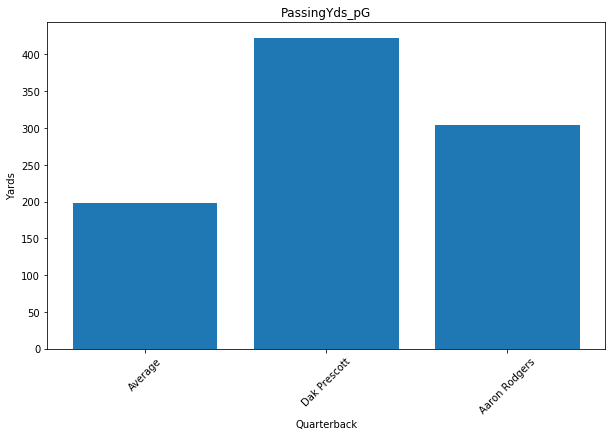

In [42]:
average, prescott, dak = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb2)

x = ['Average', prescott, rodgers]
y = [average, dak, aaron]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

Avg Completion_Percent: 0.65
Dak Prescott Completion_Percent: 0.68
--------------------------------------------------
Avg Completion_Percent: 0.65
Aaron Rodgers Completion_Percent: 0.71
--------------------------------------------------


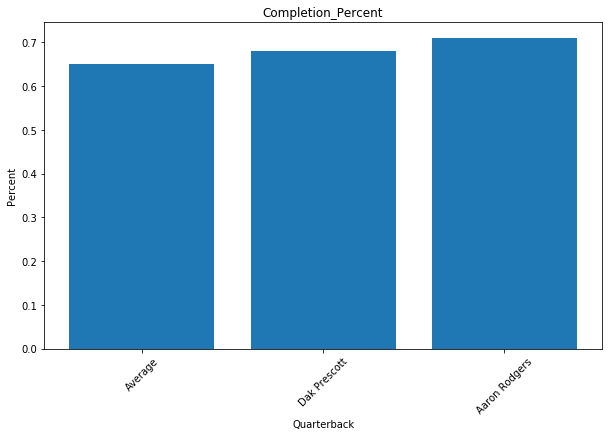

In [43]:
average, prescott, dak = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb2)

x = ['Average', prescott, rodgers]
y = [average, dak, aaron]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Percent')

Avg TTL: 52.45
Dak Prescott TTL: 125.2
--------------------------------------------------
Avg TTL: 52.45
Aaron Rodgers TTL: 103.1
--------------------------------------------------


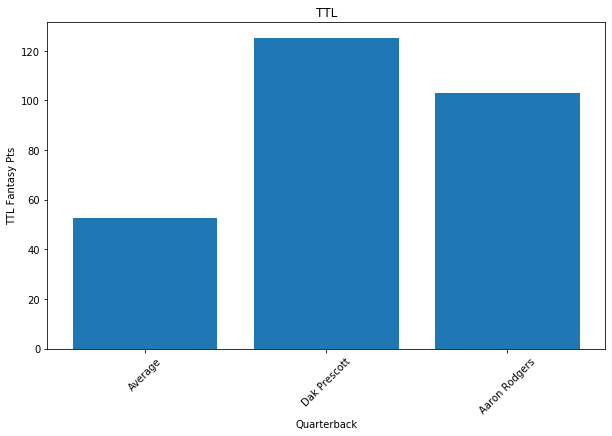

In [44]:
average, prescott, dak = print_metric(quarterbacks, 'TTL', qb1)
average, rodgers, aaron = print_metric(quarterbacks, 'TTL', qb2)

x = ['Average', prescott, rodgers]
y = [average, dak, aaron]

bar_plot(x, y, 'TTL', 'Quarterback', 'TTL Fantasy Pts')

Week 4 match ups:

    Dallas vs NYG
    Green Bay BYE Week

In [29]:
defense[defense['Team'].isin(['New York Giants'])]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
13,New York Giants,96,258,5.10,1313,120,427,3.60,4,128,6.40,89,10.80,886,7,14,9,64.30,4,2,2,10,16.00,4.00,9.00,-2.00,5.00,24.00,328.25,30.00,106.75,32.00,22.25,0.70,221.50,2.50,4.00


In [45]:
def1 = 13
def2 = None

In [46]:
print('Prescott vs Cleveland Browns Summary:')
print('-' * 50)
print('')


print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
print_metric_team(defense, 'Passing_Att_pG', def1)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', qb1)
print_metric_team(defense, 'Completions_pG', def1)
print('')
print_metric(quarterbacks, 'PassingYds_pG', qb1)
print_metric_team(defense, 'Passing_Yds_pG', def1)
print('')
print_metric(quarterbacks, 'Completion_Percent', qb1)
print_metric_team(defense, 'Completion_Percent_Allowed', def1)
print('')
print_metric(quarterbacks, 'PassingTDs', qb1)
print_metric_team(defense, 'Passing_TDs', def1)


Prescott vs Cleveland Browns Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 26.8
Dak Prescott PassesAttempted_pG: 50.25
--------------------------------------------------
Avg Passing_Att_pG: 34.9
New York Giants Passing_Att_pG: 32.0
--------------------------------------------------

Avg CompletedPasses_pG: 17.71
Dak Prescott CompletedPasses_pG: 34.25
--------------------------------------------------
Avg Completions_pG: 23.27
New York Giants Completions_pG: 22.25
--------------------------------------------------

Avg PassingYds_pG: 197.85
Dak Prescott PassingYds_pG: 422.5
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
New York Giants Passing_Yds_pG: 221.5
--------------------------------------------------

Avg Completion_Percent: 0.65
Dak Prescott Completion_Percent: 0.68
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
New York Giants Completion_Percent_Allowed: 0.7
-----------

(7.03, 'New York Giants', 7)

In [31]:
# print('Rodgers vs Atlanta Falcons Summary:')
# print('-' * 50)
# print('')


# print_metric(quarterbacks, 'PassesAttempted_pG', 22)
# print_metric_team(defense, 'Passing_Att_pG', 30)
# print('')
# print_metric(quarterbacks, 'CompletedPasses_pG', 22)
# print_metric_team(defense, 'Completions_pG', 30)
# print('')
# print_metric(quarterbacks, 'PassingYds_pG', 22)
# print_metric_team(defense, 'Passing_Yds_pG', 30)
# print('')
# print_metric(quarterbacks, 'Completion_Percent', 22)
# print_metric_team(defense, 'Completion_Percent_Allowed', 30)
# print('')
# print_metric(quarterbacks, 'PassingTDs', 22)
# print_metric_team(defense, 'Passing_TDs', 30)


When it comes to quarterback, Dak Prescott is just on another level. Throwing 50+ attempts a game compared to the average 27. He's throwing 423 yards on average and completing 68% of his passes.

If it's not a bye week, Prescott is my guy.

## Runningbacks

In [59]:
runningbacks = offense[offense['Position'] == 'RB']

In [60]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')

In [61]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
0,Alvin Kamara,NOR,RB,25,4,3,0,0,0,0,0,50,236,11.20,4,35,30,321,17.00,3,0,0,7,0,0,112.70,1,1,97.70,18.70,29.40,31.70,17.9,12.50,59.00,8.75,7.50
3,Aaron Jones,GNB,RB,26,4,4,0,0,0,0,0,65,374,12.50,4,23,15,135,9.00,2,1,0,6,0,0,94.40,2,4,86.90,13.60,41.60,14.60,17.1,16.25,93.50,5.75,3.75
4,Dalvin Cook,MIN,RB,25,4,4,0,0,0,0,0,75,424,11.50,6,11,7,40,12.10,0,1,1,6,3,0,89.90,3,5,86.40,20.80,15.10,23.90,26.6,18.75,106.00,2.75,1.75
10,Ezekiel Elliott,DAL,RB,25,4,4,0,0,0,0,0,70,273,12.00,3,30,23,159,15.10,1,3,2,4,1,0,76.70,4,11,65.20,24.70,16.20,11.80,12.5,17.50,68.25,7.50,5.75
11,Chris Carson,SEA,RB,26,4,4,0,0,0,0,0,53,237,8.70,2,16,15,113,12.30,3,1,0,5,0,0,72.50,5,12,65.00,18.60,16.80,7.60,22.0,13.25,59.25,4.00,3.75


In [62]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
11,Chris Carson,SEA,RB,26,4,4,0,0,0,0,0,53,237,8.70,2,16,15,113,12.30,3,1,0,5,0,0,72.50,5,12,65.00,18.60,16.80,7.60,22.0,13.25,59.25,4.00,3.75
45,Derrick Henry,TEN,RB,26,3,3,0,0,0,0,0,82,319,11.90,2,8,5,26,7.00,0,0,0,2,0,0,49.00,15,46,46.50,13.10,8.40,25.00,0.0,27.33,106.33,2.67,1.67
70,Darrell Henderson,LAR,RB,23,4,2,0,0,0,0,0,43,223,6.90,2,7,4,62,20.00,0,0,0,2,0,0,42.50,23,71,40.50,0.60,18.10,18.00,3.8,10.75,55.75,1.75,1.00
120,Mark Ingram,BAL,RB,31,4,4,0,0,0,0,0,34,148,7.50,2,5,3,25,11.30,0,0,0,2,0,0,30.80,35,,29.30,2.90,13.70,3.00,9.7,8.50,37.00,1.25,0.75


In [76]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [77]:
rb1 = 45
rb2 = 11
rb3 = 120
rb4 = 70

Avg RushingAttempts_pG: 4.59
Derrick Henry RushingAttempts_pG: 27.33
--------------------------------------------------
Avg RushingAttempts_pG: 4.59
Chris Carson RushingAttempts_pG: 13.25
--------------------------------------------------
Avg RushingAttempts_pG: 4.59
Mark Ingram RushingAttempts_pG: 8.5
--------------------------------------------------
Avg RushingAttempts_pG: 4.59
Darrell Henderson RushingAttempts_pG: 10.75
--------------------------------------------------


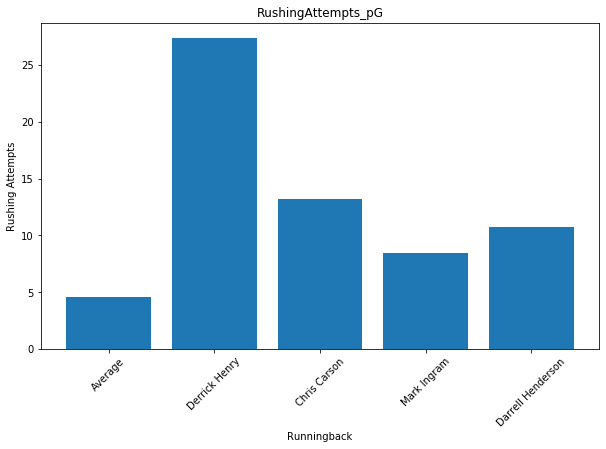

In [78]:
average, henry, derrick = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, ingram, mark = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, henderson, darrell = print_metric(available_rbs, 'RushingAttempts_pG', rb4)

x = ['Average', henry, carson, ingram, henderson]
y = [average, derrick, chris, mark, darrell]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

Avg RushingYds_pG: 18.68
Derrick Henry RushingYds_pG: 106.33
--------------------------------------------------
Avg RushingYds_pG: 18.68
Chris Carson RushingYds_pG: 59.25
--------------------------------------------------
Avg RushingYds_pG: 18.68
Mark Ingram RushingYds_pG: 37.0
--------------------------------------------------
Avg RushingYds_pG: 18.68
Darrell Henderson RushingYds_pG: 55.75
--------------------------------------------------


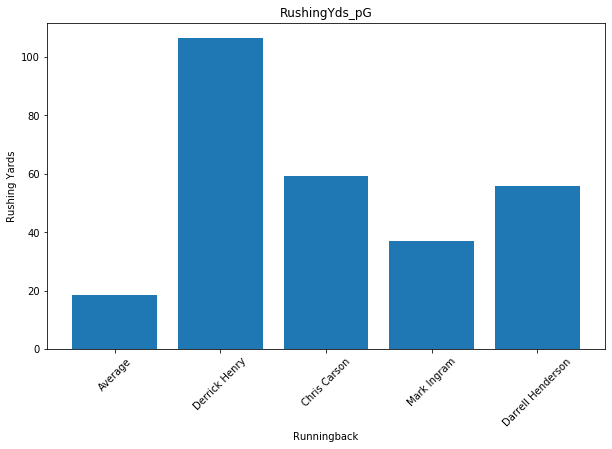

In [79]:
average, henry, derrick = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, ingram, mark = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, henderson, darrell = print_metric(available_rbs, 'RushingYds_pG', rb4)

x = ['Average', henry, carson, ingram, henderson]
y = [average, derrick, chris, mark, darrell]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

Avg Targeted_pG: 1.58
Derrick Henry Targeted_pG: 2.67
--------------------------------------------------
Avg Targeted_pG: 1.58
Chris Carson Targeted_pG: 4.0
--------------------------------------------------
Avg Targeted_pG: 1.58
Mark Ingram Targeted_pG: 1.25
--------------------------------------------------
Avg Targeted_pG: 1.58
Darrell Henderson Targeted_pG: 1.75
--------------------------------------------------


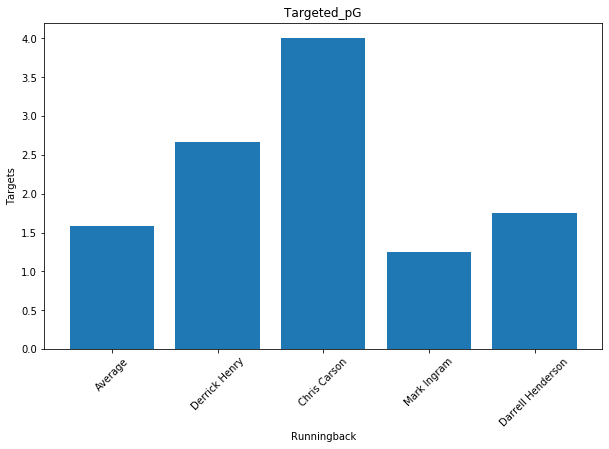

In [80]:
average, henry, derrick = print_metric(available_rbs, 'Targeted_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Targeted_pG', rb2)
average, ingram, mark = print_metric(available_rbs, 'Targeted_pG', rb3)
average, henderson, darrell = print_metric(available_rbs, 'Targeted_pG', rb4)

x = ['Average', henry, carson, ingram, henderson]
y = [average, derrick, chris, mark, darrell]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.25
Derrick Henry Receptions_pG: 1.67
--------------------------------------------------
Avg Receptions_pG: 1.25
Chris Carson Receptions_pG: 3.75
--------------------------------------------------
Avg Receptions_pG: 1.25
Mark Ingram Receptions_pG: 0.75
--------------------------------------------------
Avg Receptions_pG: 1.25
Darrell Henderson Receptions_pG: 1.0
--------------------------------------------------


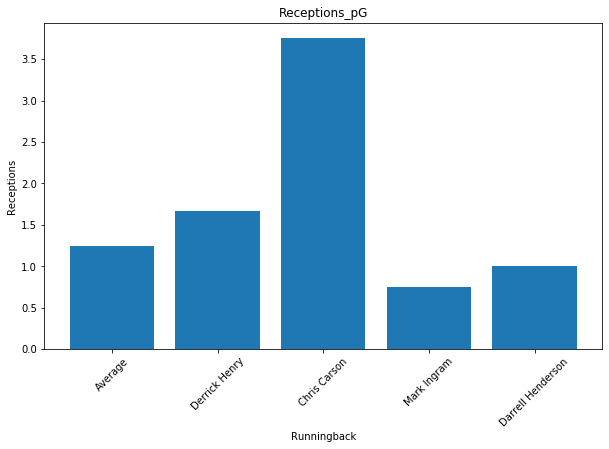

In [81]:
average, henry, derrick = print_metric(available_rbs, 'Receptions_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Receptions_pG', rb2)
average, ingram, mark = print_metric(available_rbs, 'Receptions_pG', rb3)
average, henderson, darrell = print_metric(available_rbs, 'Receptions_pG', rb4)

x = ['Average', henry, carson, ingram, henderson]
y = [average, derrick, chris, mark, darrell]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')

In [87]:
top_availRBs = available_rbs[(available_rbs['RushingAttempts_pG'] > available_rbs['RushingAttempts_pG'].mean()*1.5) & (available_rbs['RushingYds_pG'] > available_rbs['RushingYds_pG'].mean()*1.5)] 
top_availRBs = top_availRBs[~top_availRBs['Player'].isin(myteam_wrt)]
top_availRBs.sort_values('RushingYds_pG', ascending=False, inplace=True)
top_availRBs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
237,Damien Harris,NWE,RB,23,1,1,0,0,0,0,0,17,100,13.80,0,0,0,0,0.00,0,0,0,0,0,0,10.00,70,,10.00,0.00,0.00,0.00,10.0,17.00,100.00,0.00,0.00
99,Ronald Jones II,TAM,RB,23,4,4,0,0,0,0,0,57,253,8.40,1,18,12,57,11.50,0,0,0,1,0,0,43.00,28,,37.00,8.20,8.70,7.30,12.8,14.25,63.25,4.50,3.00
51,Austin Ekeler,LAC,RB,25,4,4,0,0,0,0,0,49,248,5.60,1,17,17,144,12.70,0,0,0,1,0,0,53.70,18,52,45.20,8.70,14.80,20.30,1.4,12.25,62.00,4.25,4.25
103,Adrian Peterson,DET,RB,35,4,2,0,0,0,0,0,54,245,9.40,1,6,4,31,14.50,0,0,0,1,0,0,35.60,32,,33.60,11.40,4.10,8.50,9.6,13.50,61.25,1.50,1.00
135,Sony Michel,NWE,RB,25,3,3,0,0,0,0,0,26,173,12.50,1,3,2,23,16.00,0,0,0,1,0,0,26.60,41,,25.60,9.70,1.90,14.00,0.0,8.67,57.67,1.00,0.67
109,Myles Gaskin,MIA,RB,23,4,2,0,0,0,0,0,48,192,4.00,0,20,18,113,8.80,0,0,0,0,0,0,39.50,34,,30.50,6.60,8.20,9.50,6.2,12.00,48.00,5.00,4.50
54,Antonio Gibson,WAS,RB,22,4,2,0,0,0,0,0,44,186,6.30,3,12,10,98,17.00,0,1,1,3,0,0,49.40,19,55,44.40,4.40,11.20,10.00,18.8,11.00,46.50,3.00,2.50
101,Latavius Murray,NOR,RB,30,4,1,0,0,0,0,0,44,184,5.80,2,6,4,45,13.50,0,0,0,2,0,0,36.90,31,,34.90,4.80,3.30,6.50,20.3,11.00,46.00,1.50,1.00
100,Malcolm Brown,LAR,RB,27,4,0,0,0,0,0,0,45,182,4.40,2,12,8,50,8.50,0,0,0,2,0,0,39.20,30,,35.20,23.00,4.70,1.90,5.6,11.25,45.50,3.00,2.00
128,Joshua Kelley,LAC,RB,23,4,0,0,0,0,0,0,52,174,6.50,1,7,7,84,12.00,0,2,2,1,0,0,31.30,38,,27.80,12.00,11.30,3.20,1.3,13.00,43.50,1.75,1.75


Damien Harris started in his first game of 2020 started in a big way with 17 carries.

In [89]:
rb_opp = ['Buffalo Bills', 'Minnesota Vikings', 'Cincinnati Bengals', 'Washington Football Team', 'Denver Broncos']

In [90]:
defense[defense['Team'].isin(rb_opp)]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
14,Denver Broncos,98,281,5.20,1461,105,436,4.20,2,166,5.80,108,10.20,1025,7,13,6,46.20,2,1,1,10,14.00,2.00,5.00,1.00,6.00,24.50,365.25,26.25,109.00,41.50,27.00,0.65,256.25,2.50,3.50
15,Cincinnati Bengals,99,278,5.80,1606,130,634,4.90,5,140,6.60,88,11.40,972,5,15,8,53.30,4,4,0,8,13.00,3.00,-2.00,7.00,5.00,24.75,401.50,32.50,158.50,35.00,22.00,0.63,243.00,2.00,3.25
16,Buffalo Bills,100,260,5.90,1525,92,404,4.40,4,158,6.70,107,11.00,1121,7,15,9,60.00,6,2,4,10,21.00,8.00,2.00,5.00,6.00,25.00,381.25,23.00,101.00,39.50,26.75,0.68,280.25,2.50,5.25
21,Washington Football Team,112,258,5.20,1353,118,519,4.40,6,126,6.00,81,11.40,834,7,13,8,61.50,6,5,1,14,24.00,15.00,4.00,1.00,4.00,28.00,338.25,29.50,129.75,31.50,20.25,0.64,208.50,3.50,6.00
24,Minnesota Vikings,125,278,6.10,1706,132,539,4.10,4,139,8.00,94,12.80,1167,7,17,7,41.20,3,2,1,7,7.00,-4.00,3.00,2.00,5.00,31.25,426.50,33.00,134.75,34.75,23.50,0.68,291.75,1.75,1.75


In [91]:
teamRB1 = 16
teamRB2 = 24
teamRB3 = 15
teamRB4 = 21
teamRB5 = 14

In [94]:
print(runningbacks['Player'][rb1] + ' vs ' + defense['Team'][teamRB1] + ' Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', rb1)
print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
print('')
print_metric(runningbacks, 'RushingYds_pG', rb1)
print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)

Derrick Henry vs Buffalo Bills Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.54
Derrick Henry RushingAttempts_pG: 27.33
--------------------------------------------------
Avg Rushing_Att_pG: 27.01
Buffalo Bills Rushing_Att_pG: 23.0
--------------------------------------------------

Avg RushingYds_pG: 27.86
Derrick Henry RushingYds_pG: 106.33
--------------------------------------------------
Avg Rushing_Yds_pG: 117.84
Buffalo Bills Rushing_Yds_pG: 101.0
--------------------------------------------------


(117.84, 'Buffalo Bills', 101.0)

In [95]:
print(runningbacks['Player'][rb2] + ' vs ' + defense['Team'][teamRB2] + ' Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', rb2)
print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
print('')
print_metric(runningbacks, 'RushingYds_pG', rb2)
print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)

Chris Carson vs Minnesota Vikings Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.54
Chris Carson RushingAttempts_pG: 13.25
--------------------------------------------------
Avg Rushing_Att_pG: 27.01
Minnesota Vikings Rushing_Att_pG: 33.0
--------------------------------------------------

Avg RushingYds_pG: 27.86
Chris Carson RushingYds_pG: 59.25
--------------------------------------------------
Avg Rushing_Yds_pG: 117.84
Minnesota Vikings Rushing_Yds_pG: 134.75
--------------------------------------------------


(117.84, 'Minnesota Vikings', 134.75)

In [96]:
print(runningbacks['Player'][rb3] + ' vs ' + defense['Team'][teamRB3] + ' Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', rb3)
print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
print('')
print_metric(runningbacks, 'RushingYds_pG', rb3)
print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)

Mark Ingram vs Cincinnati Bengals Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.54
Mark Ingram RushingAttempts_pG: 8.5
--------------------------------------------------
Avg Rushing_Att_pG: 27.01
Cincinnati Bengals Rushing_Att_pG: 32.5
--------------------------------------------------

Avg RushingYds_pG: 27.86
Mark Ingram RushingYds_pG: 37.0
--------------------------------------------------
Avg Rushing_Yds_pG: 117.84
Cincinnati Bengals Rushing_Yds_pG: 158.5
--------------------------------------------------


(117.84, 'Cincinnati Bengals', 158.5)

In [97]:
print(runningbacks['Player'][rb4] + ' vs ' + defense['Team'][teamRB4] + ' Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', rb4)
print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
print('')
print_metric(runningbacks, 'RushingYds_pG', rb4)
print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)

Darrell Henderson vs Washington Football Team Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.54
Darrell Henderson RushingAttempts_pG: 10.75
--------------------------------------------------
Avg Rushing_Att_pG: 27.01
Washington Football Team Rushing_Att_pG: 29.5
--------------------------------------------------

Avg RushingYds_pG: 27.86
Darrell Henderson RushingYds_pG: 55.75
--------------------------------------------------
Avg Rushing_Yds_pG: 117.84
Washington Football Team Rushing_Yds_pG: 129.75
--------------------------------------------------


(117.84, 'Washington Football Team', 129.75)

In [99]:
rb5 = 237

print(runningbacks['Player'][rb5] + ' vs ' + defense['Team'][teamRB5] + ' Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', rb5)
print_metric_team(defense, 'Rushing_Att_pG', teamRB5)
print('')
print_metric(runningbacks, 'RushingYds_pG', rb5)
print_metric_team(defense, 'Rushing_Yds_pG', teamRB5)

Damien Harris vs Denver Broncos Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.54
Damien Harris RushingAttempts_pG: 17.0
--------------------------------------------------
Avg Rushing_Att_pG: 27.01
Denver Broncos Rushing_Att_pG: 26.25
--------------------------------------------------

Avg RushingYds_pG: 27.86
Damien Harris RushingYds_pG: 100.0
--------------------------------------------------
Avg Rushing_Yds_pG: 117.84
Denver Broncos Rushing_Yds_pG: 109.0
--------------------------------------------------


(117.84, 'Denver Broncos', 109.0)

From a productivity standpoint, Ingram just isn't a part of the game like I want him to be. With Harris coming back in last week and earning an impressive 100 yards on 17 carries, I want to take a chance and add him.

## Tight End

In [100]:
tight_ends = offense[offense['Position'] == 'TE']

In [101]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')

In [102]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
22,Robert Tonyan,GNB,TE,26,4,3,0,0,0,0,0,0,0,0.00,0,14,13,173,16.10,5,0,0,5,0,0,53.80,1,23,47.30,0.00,8.50,11.00,27.8,3.50,3.25,43.25,1.25
33,Travis Kelce,KAN,TE,31,4,4,0,0,0,0,0,0,0,0.00,0,33,24,297,15.80,2,0,0,2,0,0,53.70,2,34,41.70,11.00,15.00,8.70,7.0,8.25,6.00,74.25,0.50
36,Mark Andrews,BAL,TE,24,4,1,0,0,0,0,0,0,0,0.00,0,20,12,166,21.30,4,1,0,4,0,0,46.60,3,37,40.60,17.80,2.90,2.20,17.7,5.00,3.00,41.50,1.00
49,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,4,50,36.10,9.60,20.40,6.10,0.0,6.67,4.33,60.33,1.00
50,Noah Fant,DEN,TE,23,4,4,0,0,0,0,0,0,0,0.00,0,27,19,219,16.30,2,0,0,2,1,0,45.40,5,51,35.90,14.10,13.70,4.60,3.5,6.75,4.75,54.75,0.50


In [103]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
49,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,4,50,36.10,9.60,20.40,6.10,0.0,6.67,4.33,60.33,1.00
68,Mo Alie-Cox,IND,TE,27,4,2,0,0,0,0,0,0,0,0.00,0,13,11,194,23.40,2,0,0,2,0,0,36.90,10,69,31.40,2.00,11.10,11.00,7.3,3.25,2.75,48.50,0.50


In [109]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]
available_te.sort_values('ReceivingYds_pG', ascending = False, inplace = True)
available_te.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
49,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,4,50,36.10,9.60,20.40,6.10,0.0,6.67,4.33,60.33,1.00
63,Dalton Schultz,DAL,TE,24,4,2,0,0,0,0,0,0,0,0.00,0,28,18,219,13.70,2,1,1,2,0,0,40.90,8,64,31.90,1.10,12.80,4.80,13.2,7.00,4.50,54.75,0.50
229,David Njoku,CLE,TE,24,1,0,0,0,0,0,0,0,0,0.00,0,3,3,50,22.70,1,0,0,1,0,0,12.50,35,,11.00,11.00,0.00,0.00,0.0,3.00,3.00,50.00,1.00
68,Mo Alie-Cox,IND,TE,27,4,2,0,0,0,0,0,0,0,0.00,0,13,11,194,23.40,2,0,0,2,0,0,36.90,10,69,31.40,2.00,11.10,11.00,7.3,3.25,2.75,48.50,0.50
163,Dallas Goedert,PHI,TE,25,3,1,0,0,0,0,0,0,0,0.00,0,18,13,138,16.20,1,0,0,1,0,0,26.30,20,,19.80,16.10,3.00,0.70,0.0,6.00,4.33,46.00,0.33


In [111]:
te1 = 49
te2 = 68
te3 = 63
# te4 = 22

Avg Targeted_pG: 2.29
Jonnu Smith Targeted_pG: 6.67
--------------------------------------------------
Avg Targeted_pG: 2.29
Mo Alie-Cox Targeted_pG: 3.25
--------------------------------------------------
Avg Targeted_pG: 2.29
Dalton Schultz Targeted_pG: 7.0
--------------------------------------------------


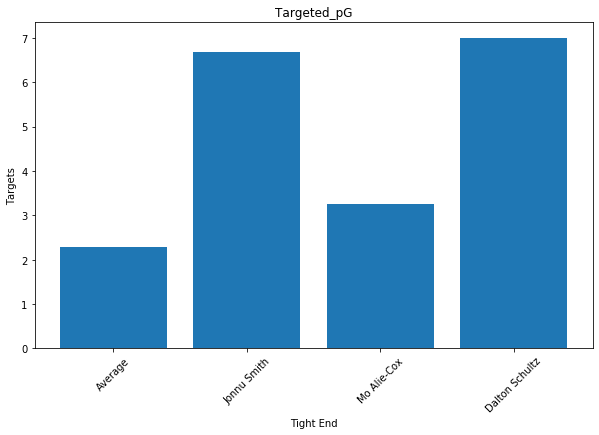

In [112]:
average, smith, jonnu = print_metric(available_te, 'Targeted_pG', te1)
average, alie_cox, mo = print_metric(available_te, 'Targeted_pG', te2)
average, schultz, dalton = print_metric(available_te, 'Targeted_pG', te3)

x = ['Average', smith, alie_cox, schultz]
y = [average, jonnu, mo, dalton]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

Avg Receptions_pG: 1.57
Jonnu Smith Receptions_pG: 4.33
--------------------------------------------------
Avg Receptions_pG: 1.57
Mo Alie-Cox Receptions_pG: 2.75
--------------------------------------------------
Avg Receptions_pG: 1.57
Dalton Schultz Receptions_pG: 4.5
--------------------------------------------------


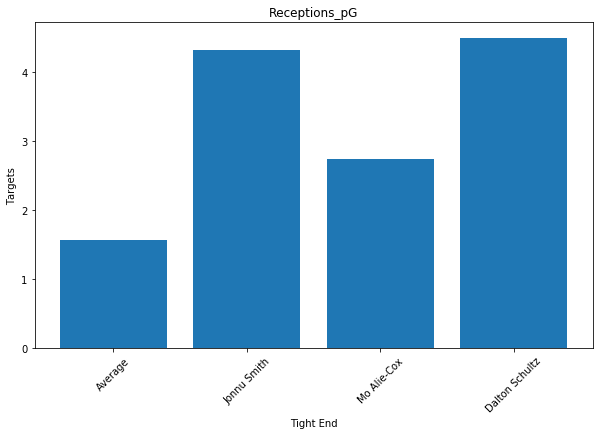

In [113]:
average, smith, jonnu = print_metric(available_te, 'Receptions_pG', te1)
average, alie_cox, mo = print_metric(available_te, 'Receptions_pG', te2)
average, schultz, dalton = print_metric(available_te, 'Receptions_pG', te3)

x = ['Average', smith, alie_cox, schultz]
y = [average, jonnu, mo, dalton]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Targets')

Avg ReceivingYds_pG: 16.27
Jonnu Smith ReceivingYds_pG: 60.33
--------------------------------------------------
Avg ReceivingYds_pG: 16.27
Mo Alie-Cox ReceivingYds_pG: 48.5
--------------------------------------------------
Avg ReceivingYds_pG: 16.27
Dalton Schultz ReceivingYds_pG: 54.75
--------------------------------------------------


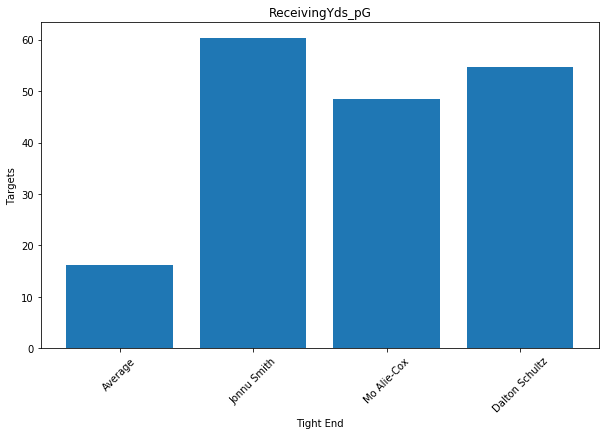

In [114]:
average, smith, jonnu = print_metric(available_te, 'ReceivingYds_pG', te1)
average, alie_cox, mo = print_metric(available_te, 'ReceivingYds_pG', te2)
average, schultz, dalton = print_metric(available_te, 'ReceivingYds_pG', te3)

x = ['Average', smith, alie_cox, schultz]
y = [average, jonnu, mo, dalton]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Targets')

In [128]:
te_opp = {'Tennessee Titans': 'Buffalo Bills', 
          'Indianapolis Colts': 'Cleveland Browns', 
          'Dallas Cowboys': 'New York Giants'}

In [130]:
defense[defense['Team'].isin(te_opp.values())]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
13,New York Giants,96,258,5.10,1313,120,427,3.60,4,128,6.40,89,10.80,886,7,14,9,64.30,4,2,2,10,16.00,4.00,9.00,-2.00,5.00,24.00,328.25,30.00,106.75,32.00,22.25,0.70,221.50,2.50,4.00
16,Buffalo Bills,100,260,5.90,1525,92,404,4.40,4,158,6.70,107,11.00,1121,7,15,9,60.00,6,2,4,10,21.00,8.00,2.00,5.00,6.00,25.00,381.25,23.00,101.00,39.50,26.75,0.68,280.25,2.50,5.25
25,Cleveland Browns,126,287,5.60,1609,94,367,3.90,4,182,6.40,120,11.10,1242,12,16,12,75.00,10,4,6,11,23.00,0.00,4.00,14.00,5.00,31.50,402.25,23.50,91.75,45.50,30.00,0.66,310.50,2.75,5.75


In [131]:
teamTE1 = 16
teamTE2 = 25
teamTE3 = 13

In [133]:
print(tight_ends['Player'][te1] + ' vs ' + defense['Team'][teamTE1] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te1)
print_metric_team(defense, 'Passing_Att_pG', teamTE1)
print('')
print_metric(tight_ends, 'Receptions_pG', te1)
print_metric_team(defense, 'Completions_pG', teamTE1)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te1)
print_metric_team(defense, 'Passing_Yds_pG', teamTE1)

Jonnu Smith vs Buffalo Bills Summary:
--------------------------------------------------

Avg Targeted_pG: 2.96
Jonnu Smith Targeted_pG: 6.67
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Buffalo Bills Passing_Att_pG: 39.5
--------------------------------------------------

Avg Receptions_pG: 2.04
Jonnu Smith Receptions_pG: 4.33
--------------------------------------------------
Avg Completions_pG: 23.27
Buffalo Bills Completions_pG: 26.75
--------------------------------------------------

Avg ReceivingYds_pG: 21.89
Jonnu Smith ReceivingYds_pG: 60.33
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Buffalo Bills Passing_Yds_pG: 280.25
--------------------------------------------------


(245.9, 'Buffalo Bills', 280.25)

In [134]:
print(tight_ends['Player'][te2] + ' vs ' + defense['Team'][teamTE2] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te2)
print_metric_team(defense, 'Passing_Att_pG', teamTE2)
print('')
print_metric(tight_ends, 'Receptions_pG', te2)
print_metric_team(defense, 'Completions_pG', teamTE2)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te2)
print_metric_team(defense, 'Passing_Yds_pG', teamTE2)

Mo Alie-Cox vs Cleveland Browns Summary:
--------------------------------------------------

Avg Targeted_pG: 2.96
Mo Alie-Cox Targeted_pG: 3.25
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Cleveland Browns Passing_Att_pG: 45.5
--------------------------------------------------

Avg Receptions_pG: 2.04
Mo Alie-Cox Receptions_pG: 2.75
--------------------------------------------------
Avg Completions_pG: 23.27
Cleveland Browns Completions_pG: 30.0
--------------------------------------------------

Avg ReceivingYds_pG: 21.89
Mo Alie-Cox ReceivingYds_pG: 48.5
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Cleveland Browns Passing_Yds_pG: 310.5
--------------------------------------------------


(245.9, 'Cleveland Browns', 310.5)

In [135]:
print(tight_ends['Player'][te3] + ' vs ' + defense['Team'][teamTE3] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te3)
print_metric_team(defense, 'Passing_Att_pG', teamTE3)
print('')
print_metric(tight_ends, 'Receptions_pG', te3)
print_metric_team(defense, 'Completions_pG', teamTE3)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te3)
print_metric_team(defense, 'Passing_Yds_pG', teamTE3)

Dalton Schultz vs New York Giants Summary:
--------------------------------------------------

Avg Targeted_pG: 2.96
Dalton Schultz Targeted_pG: 7.0
--------------------------------------------------
Avg Passing_Att_pG: 34.9
New York Giants Passing_Att_pG: 32.0
--------------------------------------------------

Avg Receptions_pG: 2.04
Dalton Schultz Receptions_pG: 4.5
--------------------------------------------------
Avg Completions_pG: 23.27
New York Giants Completions_pG: 22.25
--------------------------------------------------

Avg ReceivingYds_pG: 21.89
Dalton Schultz ReceivingYds_pG: 54.75
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
New York Giants Passing_Yds_pG: 221.5
--------------------------------------------------


(245.9, 'New York Giants', 221.5)

Mo Alie-Cox stepped up last week, but still not in the biggest way. Dalton Schultz has bene targeted 7 times per game for almost 55 yards. He has the benefit of throwing machine Dak Prescott so I'm thinking this week I abandon Alie-Cox and pick up Schultz who's going against the NY Giants who while only allowing 221.5 yards per game, teams have only attempted 32 passes a game. Prescott is throwing 50 per game. Their game is built around him throwing so I'm going all in.

## Wide Receiver

In [136]:
wrs = offense[offense['Position'] == 'WR']

In [137]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')

In [138]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG
27,DeAndre Hopkins,ARI,WR,28,4,4,0,0,0,0,0,0,0,0.00,0,46,39,397,11.80,1,0,0,1,0,0,65.20,10,28,45.70,15.10,12.80,13.70,4.1,11.50,9.75,0.85,99.25,0.25
32,Robby Anderson,CAR,WR,27,4,4,0,0,0,0,0,0,0,0.00,0,34,28,377,17.60,1,1,1,1,1,0,57.70,14,33,43.80,19.50,8.90,5.50,9.9,8.50,7.00,0.82,94.25,0.25
112,Brandon Aiyuk,SFO,WR,22,3,3,0,0,0,0,0,4,69,19.50,2,16,9,109,13.10,0,0,0,2,0,0,34.30,38,,29.80,0.00,2.10,16.10,11.6,5.33,3.00,0.56,36.33,0.00
158,Julio Jones,ATL,WR,31,3,3,0,0,0,0,0,0,0,0.00,0,20,15,213,16.00,0,0,0,0,0,0,28.80,62,,21.30,15.70,2.40,0.00,3.2,6.67,5.00,0.75,71.00,0.00
165,Diontae Johnson,PIT,WR,24,3,3,0,0,0,0,0,1,9,9.00,0,25,14,149,16.40,1,1,1,1,0,0,26.80,67,,19.80,3.70,15.20,0.90,0.0,8.33,4.67,0.56,49.67,0.33


In [147]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
top_wrs = available_wrs[(available_wrs['ReceivingYds_pG'] > available_wrs['ReceivingYds_pG'].mean()*1.5) & (available_wrs['Targeted_pG'] > available_wrs['Targeted_pG'].mean()*1.5)]
top_wrs.sort_values('ReceivingYds_pG', ascending = False, inplace = True)
top_wrs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG
125,Jamison Crowder,NYJ,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,23,14,219,21.40,1,0,0,1,0,0,34.90,43,,27.90,17.50,0.00,0.00,10.4,11.50,7.00,0.61,109.50,0.50
27,DeAndre Hopkins,ARI,WR,28,4,4,0,0,0,0,0,0,0,0.00,0,46,39,397,11.80,1,0,0,1,0,0,65.20,10,28,45.70,15.10,12.80,13.70,4.1,11.50,9.75,0.85,99.25,0.25
30,Terry McLaurin,WAS,WR,25,4,4,0,0,0,0,0,1,3,3.00,0,39,26,387,22.80,1,0,0,1,0,0,58.00,11,31,45.00,6.10,18.50,8.60,11.8,9.75,6.50,0.67,96.75,0.25
106,Davante Adams,GNB,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,20,17,192,13.90,2,0,0,2,0,0,39.70,33,,31.20,27.60,3.60,0.00,0.0,10.00,8.50,0.85,96.00,1.00
32,Robby Anderson,CAR,WR,27,4,4,0,0,0,0,0,0,0,0.00,0,34,28,377,17.60,1,1,1,1,1,0,57.70,14,33,43.80,19.50,8.90,5.50,9.9,8.50,7.00,0.82,94.25,0.25
43,Allen Lazard,GNB,WR,25,3,3,0,0,0,0,0,2,17,13.00,0,17,13,254,24.40,2,0,0,2,0,0,45.60,19,44,39.10,14.20,4.50,20.40,0.0,5.67,4.33,0.76,84.67,0.67
275,Jeff Smith,NYJ,WR,23,1,1,0,0,0,0,0,0,0,0.00,0,9,7,81,16.70,0,0,0,0,0,0,11.60,113,,8.10,0.00,0.00,0.00,8.1,9.00,7.00,0.78,81.00,0.00
122,D.J. Moore,CAR,WR,23,4,4,0,0,0,0,0,0,0,0.00,0,32,18,288,16.00,0,0,0,0,0,0,37.80,40,,28.80,5.40,12.00,6.50,4.9,8.00,4.50,0.56,72.00,0.00
158,Julio Jones,ATL,WR,31,3,3,0,0,0,0,0,0,0,0.00,0,20,15,213,16.00,0,0,0,0,0,0,28.80,62,,21.30,15.70,2.40,0.00,3.2,6.67,5.00,0.75,71.00,0.00
130,Corey Davis,TEN,WR,25,3,3,0,0,0,0,0,0,0,0.00,0,19,15,206,20.30,1,0,0,1,0,0,34.10,47,,26.60,10.10,9.60,6.90,0.0,6.33,5.00,0.79,68.67,0.33


In [149]:
wr1 = 27
wr2 = 32
wr3 = 112
wr4 = 158
wr5 = 165

Avg Targeted_pG: 3.54
DeAndre Hopkins Targeted_pG: 11.5
--------------------------------------------------
Avg Targeted_pG: 3.54
Robby Anderson Targeted_pG: 8.5
--------------------------------------------------
Avg Targeted_pG: 3.54
Brandon Aiyuk Targeted_pG: 5.33
--------------------------------------------------
Avg Targeted_pG: 3.54
Julio Jones Targeted_pG: 6.67
--------------------------------------------------
Avg Targeted_pG: 3.54
Diontae Johnson Targeted_pG: 8.33
--------------------------------------------------


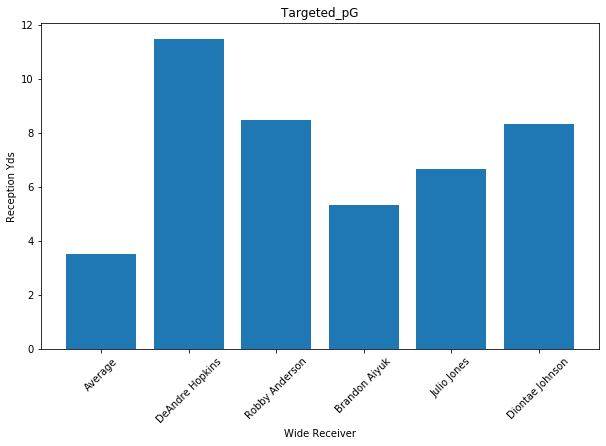

In [150]:
average, hopkins, deandre = print_metric(available_wrs, 'Targeted_pG', wr1)
average, anderson, robby = print_metric(available_wrs, 'Targeted_pG', wr2)
average, aiyuk, brandon = print_metric(available_wrs, 'Targeted_pG', wr3)
average, jones, julio = print_metric(available_wrs, 'Targeted_pG', wr4)
average, johnson, diontae = print_metric(available_wrs, 'Targeted_pG', wr5)

x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
y = [average, deandre, robby, brandon, julio, diontae]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

Avg Receptions_pG: 2.36
DeAndre Hopkins Receptions_pG: 9.75
--------------------------------------------------
Avg Receptions_pG: 2.36
Robby Anderson Receptions_pG: 7.0
--------------------------------------------------
Avg Receptions_pG: 2.36
Brandon Aiyuk Receptions_pG: 3.0
--------------------------------------------------
Avg Receptions_pG: 2.36
Julio Jones Receptions_pG: 5.0
--------------------------------------------------
Avg Receptions_pG: 2.36
Diontae Johnson Receptions_pG: 4.67
--------------------------------------------------


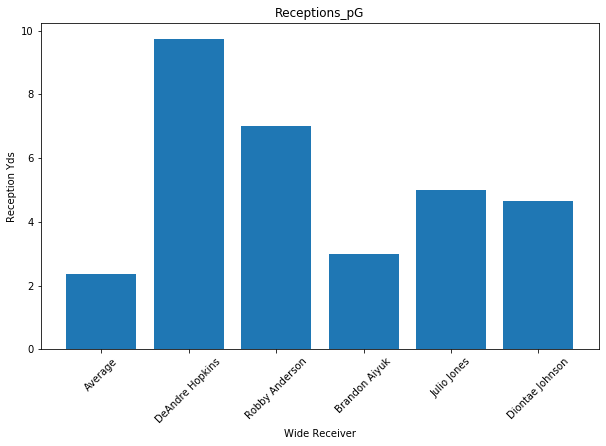

In [151]:
average, hopkins, deandre = print_metric(available_wrs, 'Receptions_pG', wr1)
average, anderson, robby = print_metric(available_wrs, 'Receptions_pG', wr2)
average, aiyuk, brandon = print_metric(available_wrs, 'Receptions_pG', wr3)
average, jones, julio = print_metric(available_wrs, 'Receptions_pG', wr4)
average, johnson, diontae = print_metric(available_wrs, 'Receptions_pG', wr5)

x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
y = [average, deandre, robby, brandon, julio, diontae]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Reception Yds')

Avg Catch_Rate: 0.7
DeAndre Hopkins Catch_Rate: 0.85
--------------------------------------------------
Avg Catch_Rate: 0.7
Robby Anderson Catch_Rate: 0.82
--------------------------------------------------
Avg Catch_Rate: 0.7
Brandon Aiyuk Catch_Rate: 0.56
--------------------------------------------------
Avg Catch_Rate: 0.7
Julio Jones Catch_Rate: 0.75
--------------------------------------------------
Avg Catch_Rate: 0.7
Diontae Johnson Catch_Rate: 0.56
--------------------------------------------------


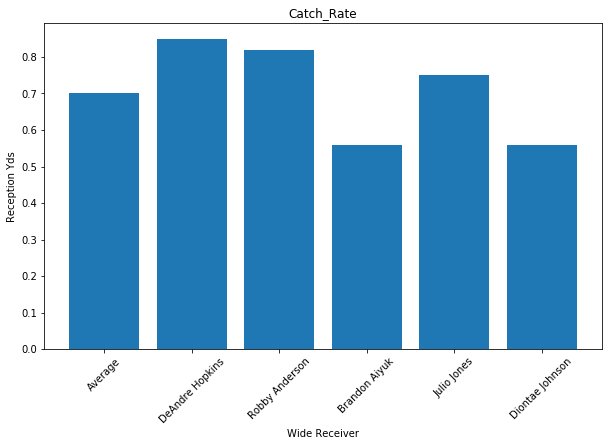

In [152]:
average, hopkins, deandre = print_metric(available_wrs, 'Catch_Rate', wr1)
average, anderson, robby = print_metric(available_wrs, 'Catch_Rate', wr2)
average, aiyuk, brandon = print_metric(available_wrs, 'Catch_Rate', wr3)
average, jones, julio = print_metric(available_wrs, 'Catch_Rate', wr4)
average, johnson, diontae = print_metric(available_wrs, 'Catch_Rate', wr5)

x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
y = [average, deandre, robby, brandon, julio, diontae]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Reception Yds')

Avg ReceivingYds_pG: 30.01
DeAndre Hopkins ReceivingYds_pG: 99.25
--------------------------------------------------
Avg ReceivingYds_pG: 30.01
Robby Anderson ReceivingYds_pG: 94.25
--------------------------------------------------
Avg ReceivingYds_pG: 30.01
Brandon Aiyuk ReceivingYds_pG: 36.33
--------------------------------------------------
Avg ReceivingYds_pG: 30.01
Julio Jones ReceivingYds_pG: 71.0
--------------------------------------------------
Avg ReceivingYds_pG: 30.01
Diontae Johnson ReceivingYds_pG: 49.67
--------------------------------------------------


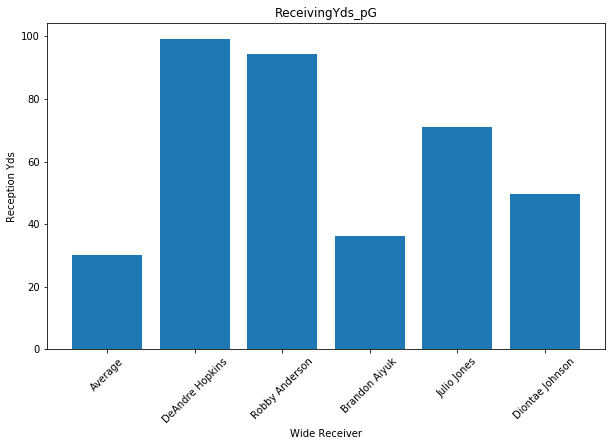

In [153]:
average, hopkins, deandre = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, anderson, robby = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, aiyuk, brandon = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, jones, julio = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, johnson, diontae = print_metric(available_wrs, 'ReceivingYds_pG', wr5)

x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
y = [average, deandre, robby, brandon, julio, diontae]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Reception Yds')

In [155]:
wr_opp = {'Arizona Cardinals': 'New York Jets', 
          'Carolina Panthers': 'Atlanta Falcons', 
          'San Francisco 49ers': 'Miami Dolphins', 
          'Atlanta Falcons': 'Carolina Panthers', 
          'Pittsburgh Steelers': 'Philadelphia Eagles'}

In [156]:
defense[defense['Team'].isin(list(wr_opp.values()))]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
12,Miami Dolphins,96,247,6.60,1639,108,499,4.60,7,130,8.20,93,13.00,1140,6,14,11,78.60,5,2,3,9,19.00,2.00,2.00,12.00,3.00,24.00,409.75,27.00,124.75,32.50,23.25,0.72,285.00,2.25,4.75
18,Carolina Panthers,102,247,5.70,1409,99,501,5.10,7,145,6.10,104,8.80,908,6,13,10,76.90,7,2,5,3,16.00,-1.00,3.00,11.00,3.00,25.50,352.25,24.75,125.25,36.25,26.00,0.72,227.00,0.75,4.00
19,Philadelphia Eagles,107,277,5.10,1409,113,435,3.80,6,147,5.90,100,11.00,974,7,16,11,68.80,4,2,2,17,28.00,3.00,-1.00,8.00,18.00,26.75,352.25,28.25,108.75,36.75,25.00,0.68,243.50,4.25,7.00
28,New York Jets,131,259,5.70,1475,124,516,4.20,6,129,7.10,93,10.60,959,7,17,10,58.80,6,4,2,6,19.00,7.00,4.00,0.00,8.00,32.75,368.75,31.00,129.00,32.25,23.25,0.72,239.75,1.50,4.75
29,Atlanta Falcons,138,277,6.50,1793,102,427,4.20,5,168,7.80,121,11.70,1366,13,18,14,77.80,5,2,3,7,7.00,-1.00,3.00,5.00,0.00,34.50,448.25,25.50,106.75,42.00,30.25,0.72,341.50,1.75,1.75


In [157]:
teamWR1 = 28
teamWR2 = 29
teamWR3 = 12
teamWR4 = 18
teamWR5 = 19

In [160]:
print(wrs['Player'][wr1] + ' vs ' + defense['Team'][teamWR1] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr1)
print_metric_team(defense, 'Passing_Att_pG', teamWR1)
print('')
print_metric(wrs, 'Receptions_pG', wr1)
print_metric_team(defense, 'Completions_pG', teamWR1)
print('')
print_metric(wrs, 'Catch_Rate', wr1)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr1)
print_metric_team(defense, 'Passing_Yds_pG', teamWR1)

DeAndre Hopkins vs New York Jets Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
DeAndre Hopkins Targeted_pG: 11.5
--------------------------------------------------
Avg Passing_Att_pG: 34.9
New York Jets Passing_Att_pG: 32.25
--------------------------------------------------

Avg Receptions_pG: 2.84
DeAndre Hopkins Receptions_pG: 9.75
--------------------------------------------------
Avg Completions_pG: 23.27
New York Jets Completions_pG: 23.25
--------------------------------------------------

Avg Catch_Rate: 0.69
DeAndre Hopkins Catch_Rate: 0.85
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
New York Jets Completion_Percent_Allowed: 0.72
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
DeAndre Hopkins ReceivingYds_pG: 99.25
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
New York Jets Passing_Yds_pG: 239.75
----------------------------------------

(245.9, 'New York Jets', 239.75)

In [161]:
print(wrs['Player'][wr2] + ' vs ' + defense['Team'][teamWR2] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr2)
print_metric_team(defense, 'Passing_Att_pG', teamWR2)
print('')
print_metric(wrs, 'Receptions_pG', wr2)
print_metric_team(defense, 'Completions_pG', teamWR2)
print('')
print_metric(wrs, 'Catch_Rate', wr2)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr2)
print_metric_team(defense, 'Passing_Yds_pG', teamWR2)

Robby Anderson vs Atlanta Falcons Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
Robby Anderson Targeted_pG: 8.5
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Atlanta Falcons Passing_Att_pG: 42.0
--------------------------------------------------

Avg Receptions_pG: 2.84
Robby Anderson Receptions_pG: 7.0
--------------------------------------------------
Avg Completions_pG: 23.27
Atlanta Falcons Completions_pG: 30.25
--------------------------------------------------

Avg Catch_Rate: 0.69
Robby Anderson Catch_Rate: 0.82
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
Atlanta Falcons Completion_Percent_Allowed: 0.72
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
Robby Anderson ReceivingYds_pG: 94.25
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Atlanta Falcons Passing_Yds_pG: 341.5
---------------------------------------

(245.9, 'Atlanta Falcons', 341.5)

In [162]:
print(wrs['Player'][wr3] + ' vs ' + defense['Team'][teamWR3] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr3)
print_metric_team(defense, 'Passing_Att_pG', teamWR3)
print('')
print_metric(wrs, 'Receptions_pG', wr3)
print_metric_team(defense, 'Completions_pG', teamWR3)
print('')
print_metric(wrs, 'Catch_Rate', wr3)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr3)
print_metric_team(defense, 'Passing_Yds_pG', teamWR3)

Brandon Aiyuk vs Miami Dolphins Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
Brandon Aiyuk Targeted_pG: 5.33
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Miami Dolphins Passing_Att_pG: 32.5
--------------------------------------------------

Avg Receptions_pG: 2.84
Brandon Aiyuk Receptions_pG: 3.0
--------------------------------------------------
Avg Completions_pG: 23.27
Miami Dolphins Completions_pG: 23.25
--------------------------------------------------

Avg Catch_Rate: 0.69
Brandon Aiyuk Catch_Rate: 0.56
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
Miami Dolphins Completion_Percent_Allowed: 0.72
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
Brandon Aiyuk ReceivingYds_pG: 36.33
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Miami Dolphins Passing_Yds_pG: 285.0
------------------------------------------------

(245.9, 'Miami Dolphins', 285.0)

In [163]:
print(wrs['Player'][wr4] + ' vs ' + defense['Team'][teamWR4] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr4)
print_metric_team(defense, 'Passing_Att_pG', teamWR4)
print('')
print_metric(wrs, 'Receptions_pG', wr4)
print_metric_team(defense, 'Completions_pG', teamWR4)
print('')
print_metric(wrs, 'Catch_Rate', wr4)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr4)
print_metric_team(defense, 'Passing_Yds_pG', teamWR4)

Julio Jones vs Carolina Panthers Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
Julio Jones Targeted_pG: 6.67
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Carolina Panthers Passing_Att_pG: 36.25
--------------------------------------------------

Avg Receptions_pG: 2.84
Julio Jones Receptions_pG: 5.0
--------------------------------------------------
Avg Completions_pG: 23.27
Carolina Panthers Completions_pG: 26.0
--------------------------------------------------

Avg Catch_Rate: 0.69
Julio Jones Catch_Rate: 0.75
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
Carolina Panthers Completion_Percent_Allowed: 0.72
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
Julio Jones ReceivingYds_pG: 71.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Carolina Panthers Passing_Yds_pG: 227.0
--------------------------------------------

(245.9, 'Carolina Panthers', 227.0)

In [164]:
print(wrs['Player'][wr5] + ' vs ' + defense['Team'][teamWR5] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr5)
print_metric_team(defense, 'Passing_Att_pG', teamWR5)
print('')
print_metric(wrs, 'Receptions_pG', wr5)
print_metric_team(defense, 'Completions_pG', teamWR5)
print('')
print_metric(wrs, 'Catch_Rate', wr5)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr5)
print_metric_team(defense, 'Passing_Yds_pG', teamWR5)

Diontae Johnson vs Philadelphia Eagles Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
Diontae Johnson Targeted_pG: 8.33
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Philadelphia Eagles Passing_Att_pG: 36.75
--------------------------------------------------

Avg Receptions_pG: 2.84
Diontae Johnson Receptions_pG: 4.67
--------------------------------------------------
Avg Completions_pG: 23.27
Philadelphia Eagles Completions_pG: 25.0
--------------------------------------------------

Avg Catch_Rate: 0.69
Diontae Johnson Catch_Rate: 0.56
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
Philadelphia Eagles Completion_Percent_Allowed: 0.68
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
Diontae Johnson ReceivingYds_pG: 49.67
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Philadelphia Eagles Passing_Yds_pG: 243.5
------------

(245.9, 'Philadelphia Eagles', 243.5)

I picked up Brandon Aiyuk when Allan Lazard underwent season ending surgery, but it was only because he had scored the most fantasy points by that time and I knew I wasn't starting him. I may want to swap him out for someone else but I'm not jumping for anyone right at this minute.

Julio Jones is someone I do need to keep an eye on. He hasn't played all week and is still grappling with a hamstring injury. When he's on he's great, but when he's not actually playing right now. I want to make sure my team has a good line up should he go out in any big way.

## Defense

In [192]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [193]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
ARI,99,144,919,7,5,118,578,5,135,99,919,7,4,1,12,329.00
ATL,108,168,1246,7,2,104,405,5,165,108,1246,7,1,0,12,366.90
BAL,68,100,778,7,2,120,643,5,98,69,793,7,5,2,13,310.10
BUF,105,148,1326,12,1,100,373,4,144,105,1326,12,4,4,16,410.40
CAR,103,141,1147,4,3,109,464,6,137,103,1147,4,3,2,10,331.50


In [194]:
per_week(ttl_offense, 'CompletedPasses', no_games)
per_week(ttl_offense, 'PassesAttempted', no_games)
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week(ttl_offense, 'PassingYds', no_games)
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week(ttl_offense, 'RushingAttempts', no_games)
per_week(ttl_offense, 'RushingYds', no_games)
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
per_week(ttl_offense, 'TtlTDs', no_games)

In [195]:
defense[defense['Team'] == 'New England Patriots']

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
10,New England Patriots,92,229,6.10,1396,104,461,4.40,1,119,7.50,84,11.60,935,9,12,7,58.30,8,4,4,6,36.00,11.00,6.00,15.00,4.00,23.00,349.00,26.00,115.25,29.75,21.00,0.71,233.75,1.50,9.00


In [196]:
ttl_offense.reset_index(inplace=True)

In [197]:
ttl_offense[ttl_offense['Team'] == 'DEN']

,Team,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,TtlTDs_pG
9,DEN,85,142,963,6,6,97,370,3,136,85,963,6,6,2,9,286.30,21.25,35.50,0.60,240.75,6.78,24.25,92.50,3.81,2.25


In [198]:
taken_def = ['Arizona Cardinals', 'Baltimore Ravens', 'Buffalo Bills', 'Indianapolis Colts', 'Kansas City Chiefs', 
             'Los Angeles Rams', 'Pittsburgh Steelers', 'San Francisco 49ers', 'Tampa Bay Buccaneers']

In [199]:
available_def = defense[~defense['Team'].isin(taken_def)]

In [207]:
available_def.sort_values('Ttl_Yds_pG', inplace = True)
available_def.head()

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
5,Tennessee Titans,74,195,6.50,1267,86,498,5.80,3,105,7.10,68,11.90,769,7,10,8,80.00,6,4,2,4,25.00,3.00,5.00,7.00,10.00,18.50,316.75,21.50,124.50,26.25,17.00,0.65,192.25,1.00,6.25
13,New York Giants,96,258,5.10,1313,120,427,3.60,4,128,6.40,89,10.80,886,7,14,9,64.30,4,2,2,10,16.00,4.00,9.00,-2.00,5.00,24.00,328.25,30.00,106.75,32.00,22.25,0.70,221.50,2.50,4.00
23,New Orleans Saints,123,256,5.20,1337,109,390,3.60,4,137,6.40,89,11.40,947,11,17,14,82.40,5,3,2,10,20.00,15.00,4.00,-3.00,4.00,30.75,334.25,27.25,97.50,34.25,22.25,0.65,236.75,2.50,5.00
21,Washington Football Team,112,258,5.20,1353,118,519,4.40,6,126,6.00,81,11.40,834,7,13,8,61.50,6,5,1,14,24.00,15.00,4.00,1.00,4.00,28.00,338.25,29.50,129.75,31.50,20.25,0.64,208.50,3.50,6.00
7,Chicago Bears,81,267,5.20,1381,110,460,4.20,4,149,5.90,84,11.50,921,3,16,6,37.50,4,3,1,8,21.00,3.00,12.00,4.00,2.00,20.25,345.25,27.50,115.00,37.25,21.00,0.56,230.25,2.00,5.25


In [203]:
def_team = 10
off_team = 9

In [211]:
print(defense['Team'][def_team] + ' vs ' + ttl_offense['Team'][off_team] + ' Summary:')
print('-'*50)
print('')

print_metric_team(defense, 'Rushing_Att_pG', def_team)
print_metric_team(ttl_offense, 'RushingAttempts_pG', off_team)

print('')

print_metric_team(defense, 'Rushing_Yds_pG', def_team)
print_metric_team(ttl_offense, 'RushingYds_pG', off_team)

print('')

print_metric_team(defense, 'Rushing_Yds_pG', def_team)
print_metric_team(ttl_offense, 'RushingYds_pG', off_team)

New England Patriots vs DEN Summary:
--------------------------------------------------

Avg Rushing_Att_pG: 27.01
New England Patriots Rushing_Att_pG: 26.0
--------------------------------------------------
Avg RushingAttempts_pG: 26.97
DEN RushingAttempts_pG: 24.25
--------------------------------------------------

Avg Rushing_Yds_pG: 117.84
New England Patriots Rushing_Yds_pG: 115.25
--------------------------------------------------
Avg RushingYds_pG: 117.8
DEN RushingYds_pG: 92.5
--------------------------------------------------


(117.8, 'DEN', 92.5)